Problem Statement:


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.


You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing Necessery liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
#Importing dataset
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\ML Projects\csv\DSData-master\loan_prediction.csv")

In [3]:
# Checking the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Printing Number of rows and columns
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have 8 columns of Object datatype we need to convert it them into integers before fitting

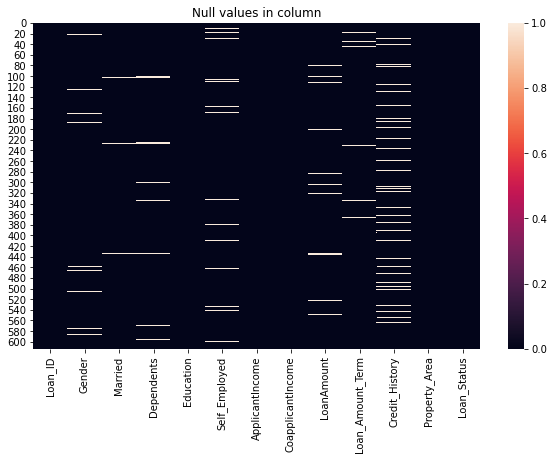

In [6]:
# Visual Representaion of missing values 
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Null values in column")
plt.show()

We can see we have multiple null values in many of our columns

In [7]:
# checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Cheking How data is spread
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Checking duplicated values

df.duplicated().sum()

0

In [10]:
# Filling Nab values
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Gender'] = df['Gender'].fillna('Male')

In [12]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [13]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
df['Married'] = df['Married'].fillna('Yes')

In [15]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df['Dependents']= df['Dependents'].fillna('0')

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [20]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df['LoanAmount'].mean()

146.41216216216216

In [22]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [23]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)

In [25]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
df['Credit_History']= df['Credit_History'].fillna(1)

In [28]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

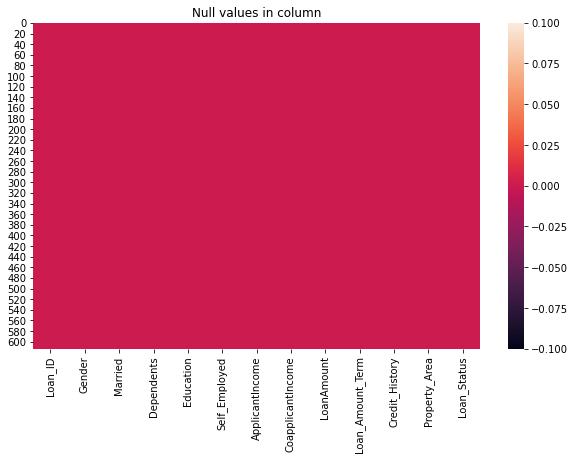

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Null values in column")
plt.show()

We can see all Nans removed from our dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
df.drop('Loan_ID', axis=1, inplace = True)

As We have most of Categorical data we cant see any normal distribution but with above visulazation we can see that columns have skewness

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [33]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 0, 'Loan stetus Not(0) vs Approved(1)')

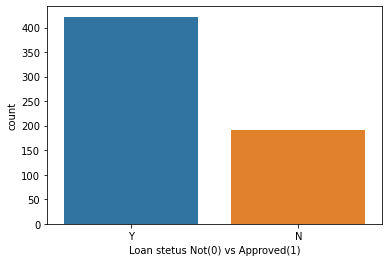

In [34]:
sns.countplot(df['Loan_Status'])
plt.xlabel('Loan stetus Not(0) vs Approved(1)')

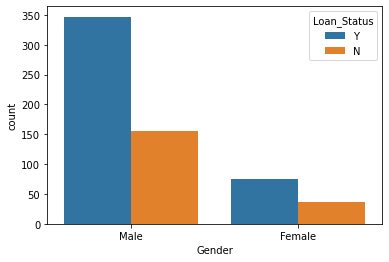

In [35]:
sns.countplot(x ='Gender', hue = 'Loan_Status', data = df)

plt.show()

We can see that Males have more loans approved than females

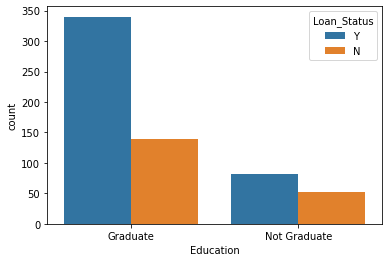

In [36]:
sns.countplot(x ='Education', hue = 'Loan_Status', data = df)

plt.show()

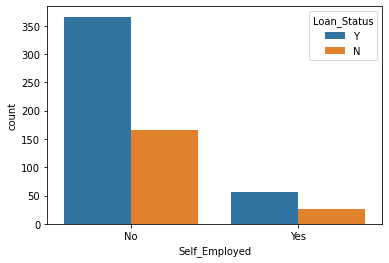

In [37]:
sns.countplot(x ='Self_Employed', hue = 'Loan_Status', data = df)
plt.show()

We can see that self employeed has less number of loan approvals

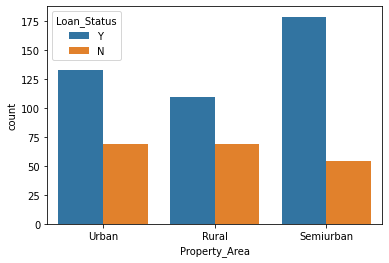

In [38]:
sns.countplot(x ='Property_Area', hue = 'Loan_Status', data = df)
plt.show()

We can see application approval rate is higest in SemiUrban Area

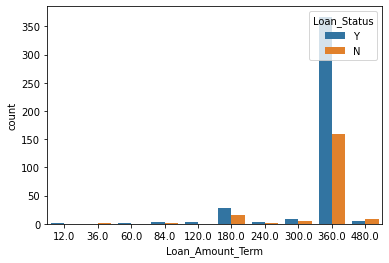

In [39]:
sns.countplot(x ='Loan_Amount_Term', hue = 'Loan_Status', data = df)
plt.show()

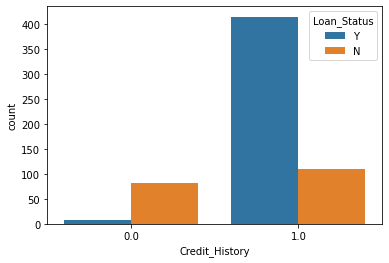

In [40]:

sns.countplot(x ='Credit_History', hue = 'Loan_Status', data = df)
plt.show()

We surrly can say load approval rate is higher with 1 credit history

In [41]:
# Before Processing we need to convert all Object datatype columns into integers
# Using label Encoder 
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['Gender'] = lab.fit_transform(df['Gender'])
df['Married'] = lab.fit_transform(df['Married'])
df['Self_Employed'] = lab.fit_transform(df['Self_Employed'])
df['Education'] = lab.fit_transform(df['Education'])
df['Property_Area'] = lab.fit_transform(df['Property_Area'])
df['Loan_Status'] = lab.fit_transform(df['Loan_Status'])
df['Dependents'] = lab.fit_transform(df['Dependents'])

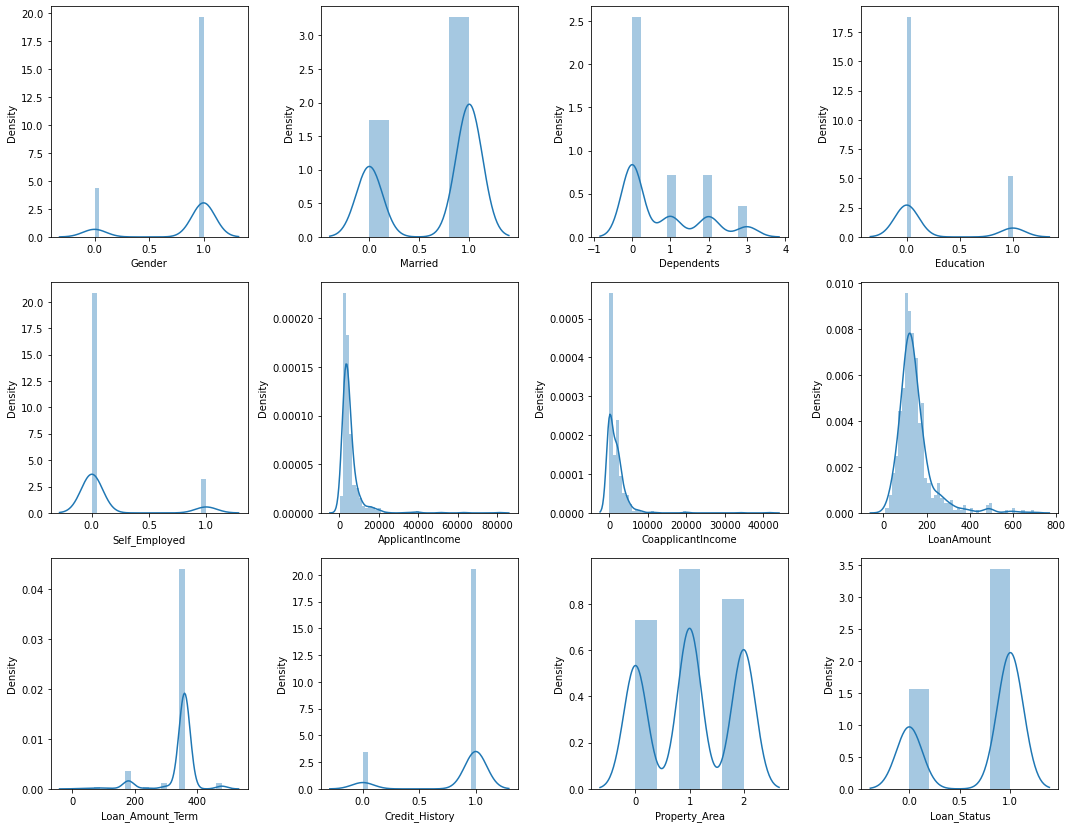

In [42]:
# Checking data Distribution

plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

Distplot Analysis - 

* We have more male applicants than that of female

* Married people are more likely to apply for the loan

* Graduate Peoples are more likely to apply for loans

* Applicants income is distributed between 0 to  20000 $

* Loan amount is highy distributed between 0 to 300

* We have skeweed data we need to remove skewness before model fitting

In [43]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


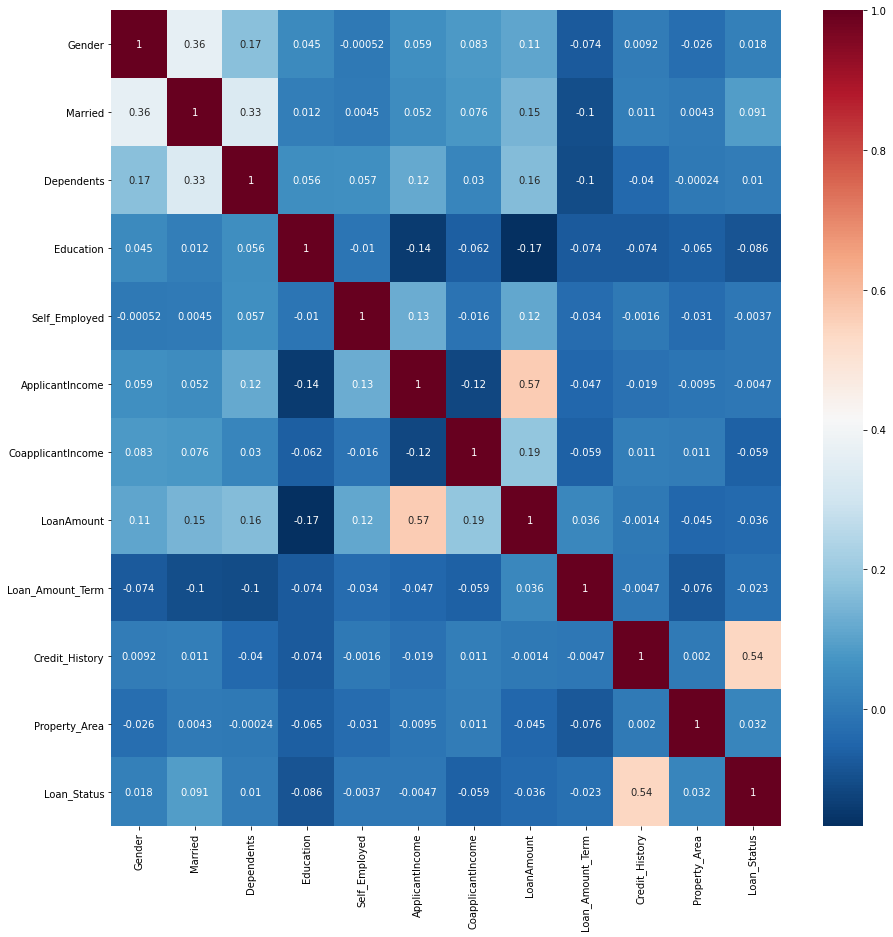

In [44]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot =True, cmap= "RdBu_r")
plt.show()

Here we can see string Positive correlation exists between applicants income and load amount

Also our target column is highly postively correlated with Credit history



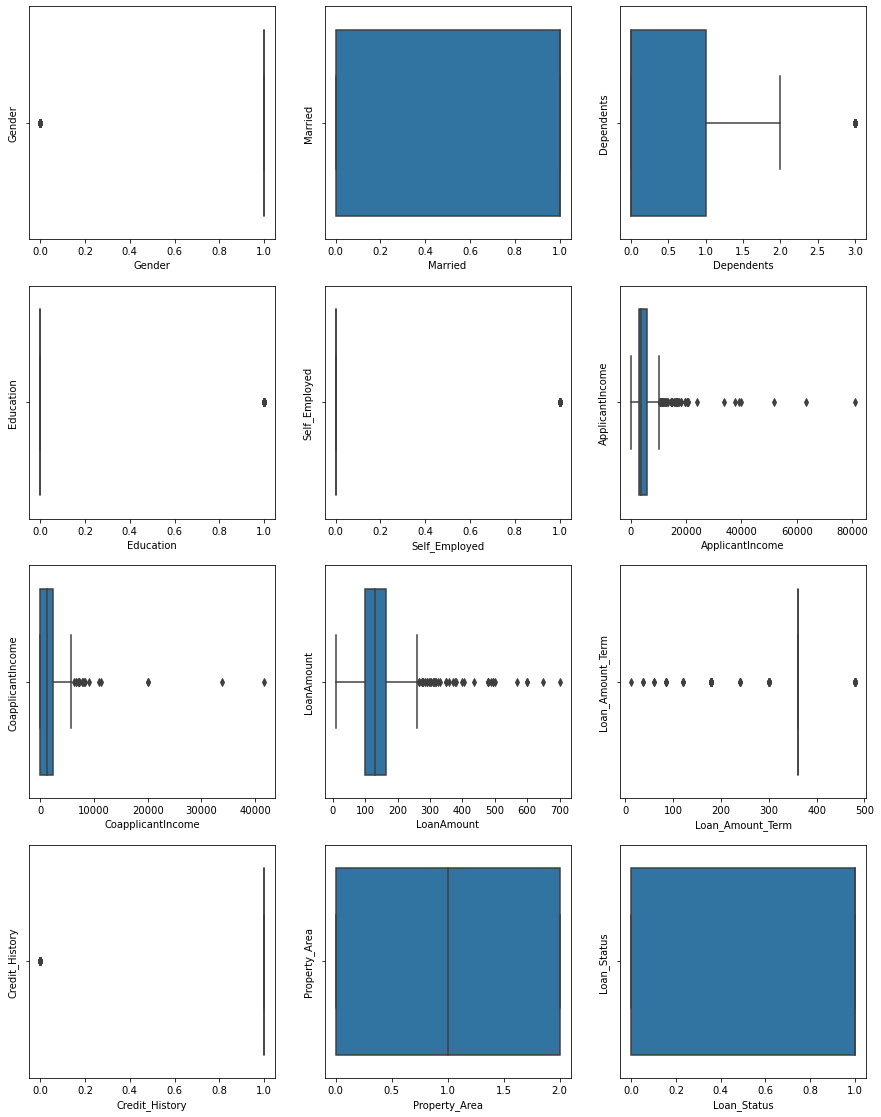

In [45]:
# Checking for outliers

plt.figure(figsize = (15,30))
graph = 1

for column in df:
    if graph <=16:
        ax = plt.subplot(6,3,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

We can see we have outliers in few of our columns

In [46]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
# Removing outliers with Z-score


                 
from scipy.stats import zscore

z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [48]:
df.shape

(589, 12)

In [49]:
# Checking data lost

print ('Data lost = ', ((614-589)/614)*100 , '%')

Data lost =  4.071661237785016 %


In [50]:
# Splitting data into label and features
x= df.drop(df[['Loan_Status']], axis = 1)
y = df['Loan_Status']

In [51]:
#Checking skewness

df.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

In [53]:
# Removing skewness with Power Transformation

from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

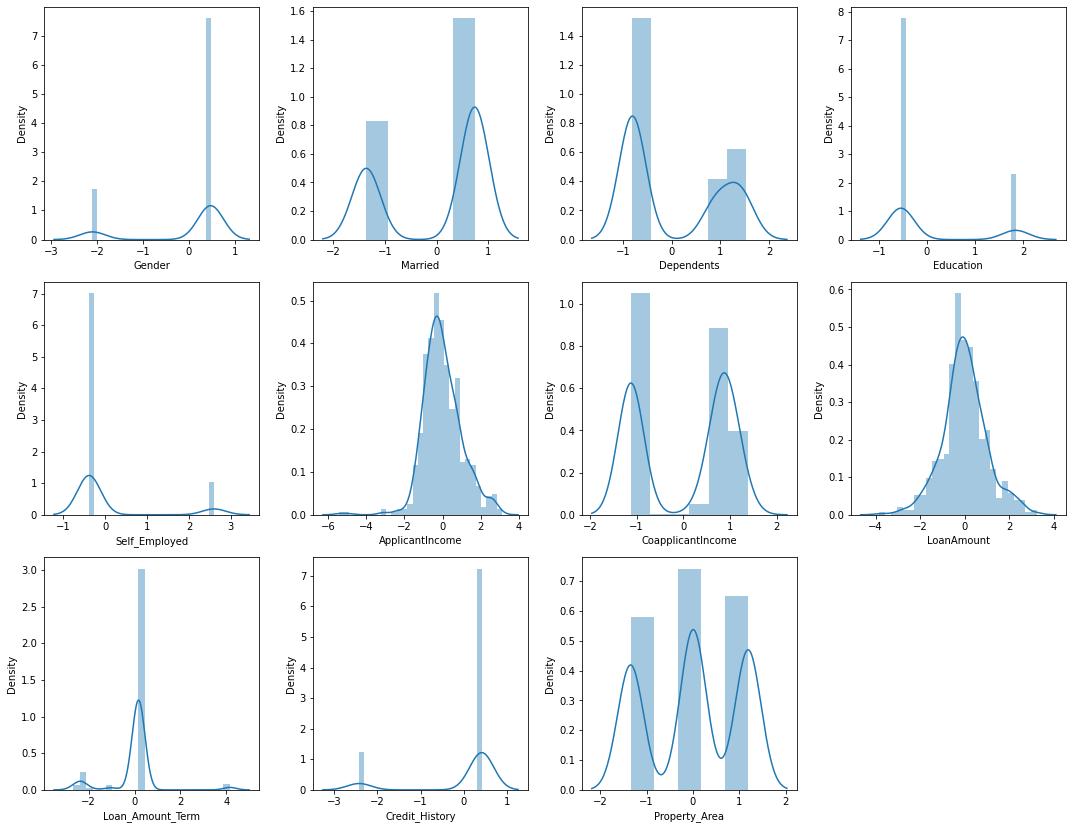

In [54]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

We can see most skewness removed rest are the categorical columns

In [55]:
 # Finding best random state to split data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [56]:
maxAcc = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    

    

Best Accuracy= 0.903954802259887 Random state= 467


In [57]:
# Splitting data with best accuracy

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=467)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

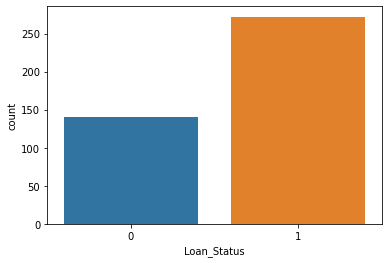

In [58]:
sns.countplot(y_train)

In [60]:
# Importing SMOTE for OverSampling
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()

ove_smp = SMOTE(0.80)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train,y_train)

print ("number of samples before fit{}".format(Counter(y_train))) 
print ("number of samples after fit{}".format(Counter(y_train_ns)))   


number of samples before fitCounter({1: 272, 0: 140})
number of samples after fitCounter({1: 272, 0: 217})


In [61]:
y_train = y_train_ns
x_train = x_train_ns

In [62]:
#ModeL building with Logistic Regression
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))


Accuracy 87.00564971751412
[[ 28  14]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        42
           1       0.90      0.93      0.92       135

    accuracy                           0.87       177
   macro avg       0.83      0.80      0.81       177
weighted avg       0.87      0.87      0.87       177



In [63]:
# ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy 0.655367231638418
[[27 15]
 [46 89]]
              precision    recall  f1-score   support

           0       0.37      0.64      0.47        42
           1       0.86      0.66      0.74       135

    accuracy                           0.66       177
   macro avg       0.61      0.65      0.61       177
weighted avg       0.74      0.66      0.68       177



In [64]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accurecy',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accurecy 85.31073446327684
[[ 30  12]
 [ 14 121]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        42
           1       0.91      0.90      0.90       135

    accuracy                           0.85       177
   macro avg       0.80      0.81      0.80       177
weighted avg       0.86      0.85      0.85       177



In [65]:
#ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 83.05084745762711
[[ 27  15]
 [ 15 120]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        42
           1       0.89      0.89      0.89       135

    accuracy                           0.83       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.83      0.83      0.83       177



In [66]:
#ModeL building with SGD
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

new_pred = sgd.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 89.83050847457628
[[ 27  15]
 [  3 132]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        42
           1       0.90      0.98      0.94       135

    accuracy                           0.90       177
   macro avg       0.90      0.81      0.84       177
weighted avg       0.90      0.90      0.89       177



In [67]:
#ModeL building with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy= 81.35593220338984
Confusion Matrix [[ 29  13]
 [ 20 115]]
Classification Report               precision    recall  f1-score   support

           0       0.59      0.69      0.64        42
           1       0.90      0.85      0.87       135

    accuracy                           0.81       177
   macro avg       0.75      0.77      0.76       177
weighted avg       0.83      0.81      0.82       177



In [68]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())
scr = cross_val_score(dt, x,y, cv=8)
print("Cross validation score for Decision tree is", scr.mean())
scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for RandomForestClassifier is", scr.mean())
scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for SVC is", scr.mean())
scr = cross_val_score(sgd, x,y, cv=8)
print("Cross validation score for  SGDClassifier is", scr.mean())
scr = cross_val_score(gbk, x,y, cv=8)
print("Cross validation score for GradientBoostingClassifier is", scr.mean())



Cross validation score for Logistic Regression is 0.8150916327286191
Cross validation score for Decision tree is 0.7130923731951129
Cross validation score for RandomForestClassifier is 0.7946131062569418
Cross validation score for SVC is 0.8167576823398741
Cross validation score for  SGDClassifier is 0.7811458718992965
Cross validation score for GradientBoostingClassifier is 0.7947982228804147


We can see GradientBoostingClassifier is working best among all

Hyper_parameter Tunning for GradientBoostingClassifier with Grid_sraechCV

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

param_grid = {
    "n_estimators":[5,50,250,500,750],
    "max_depth":[1,3,5,7,9,11,13],
    "learning_rate":[0.01,0.1,1,10,100,1000]
}

In [70]:
# Importing and fitting GSCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gbc,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'n_estimators': [5, 50, 250, 500, 750]})

In [71]:
print(grid.best_estimator_)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=50)


In [73]:
grid_pred = grid.best_estimator_.predict(x_test)

accuracy_score(y_test, grid_pred)

0.8135593220338984

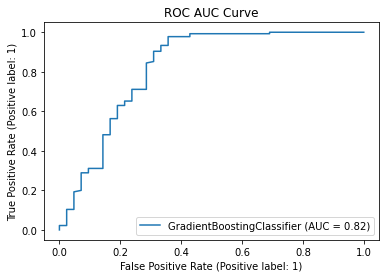

In [74]:
# ROC AUC Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [75]:
# Saving Model

import joblib


joblib.dump(grid.best_estimator_,"Loan_application.pkl")

['Loan_application.pkl']